<a href="https://colab.research.google.com/github/amontoy6/Entrega-Notebooks-Lab-2-y-3/blob/main/lab4_pandas_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# Ana Maria Montoya Mesa
# Universidad EAFIT 
# 2023-1
#

In [2]:
#configuración en google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# dependencias que eventualmente requerirá instalar:
!pip install nltk
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otras

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [ ]:
# directorios (path) de entrada y salida:
# 
path_in="gdrive/MyDrive/Maestria/st1800-231/datasets/doaj_1.csv"
path_out="gdrive/MyDrive/st1800-231/out/"
filename='doaj_1.csv'

In [ ]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# abrir un archivo con pandas desde aws s3
#df = pd.read_csv('s3://emontoyapublic/doaj_1.csv',delimiter=',')
df = pd.read_csv('gdrive/MyDrive/Maestria/st1800-231/datasets/doaj_1.csv',delimiter=',')
df.head()


,title,url,path,keywords,category,source,content
0,Crystal structure of apatite type Ca2.49Nd7.51...,http://scripts.iucr.org/cgi-bin/paper?S2056989...,article_batch_1.csv,"crystal structure, apatite structure type, cal...",articles,doaj,"The title compound, Ca2+xNd8–x(SiO4)6O2–0.5x (..."
1,Genetic Programming for Medicinal Plant Family...,http://journals.itb.ac.id/index.php/jictra/art...,article_batch_1.csv,NaN,articles,doaj,Information about medicinal plants that is ava...
2,Managing reality shock: Expectations versus ex...,https://sajip.co.za/index.php/sajip/article/vi...,article_batch_1.csv,"Managing reality shock, Graduate engineers",articles,doaj,The objective of the study is an analysis of t...
3,A Review of Systems and Technologies for Smart...,http://www.mdpi.com/1996-1073/9/5/348,article_batch_1.csv,"smart home, smart grid, energy management syst...",articles,doaj,In the actual era of smart homes and smart gri...
4,Functional testing of the vestibular ocular re...,http://journal.frontiersin.org/Journal/10.3389...,article_batch_1.csv,"Semicircular Canals, Dynamic Visual Acuity, He...",articles,doaj,The experimental assessment of the vestibulo-o...


In [ ]:
!pip3 install nltk
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = df[['title','content']]
df.head()

,title,content
0,Crystal structure of apatite type Ca2.49Nd7.51...,"The title compound, Ca2+xNd8–x(SiO4)6O2–0.5x (..."
1,Genetic Programming for Medicinal Plant Family...,Information about medicinal plants that is ava...
2,Managing reality shock: Expectations versus ex...,The objective of the study is an analysis of t...
3,A Review of Systems and Technologies for Smart...,In the actual era of smart homes and smart gri...
4,Functional testing of the vestibular ocular re...,The experimental assessment of the vestibulo-o...


In [ ]:
df['tokenized_title'] = df.apply(lambda row: nltk.word_tokenize(str(row['title'])), axis=1)
df['count_title'] = df.apply(lambda row: len(row['tokenized_title']), axis=1)
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(str(row['content'])), axis=1)
df['count_content'] = df.apply(lambda row: len(row['tokenized_content']), axis=1)

In [ ]:
df.head()

,title,content,tokenized_title,count_title,tokenized_content,count_content
0,Crystal structure of apatite type Ca2.49Nd7.51...,"The title compound, Ca2+xNd8–x(SiO4)6O2–0.5x (...","[Crystal, structure, of, apatite, type, Ca2.49...",10,"[The, title, compound, ,, Ca2+xNd8–x, (, SiO4,...",141
1,Genetic Programming for Medicinal Plant Family...,Information about medicinal plants that is ava...,"[Genetic, Programming, for, Medicinal, Plant, ...",8,"[Information, about, medicinal, plants, that, ...",253
2,Managing reality shock: Expectations versus ex...,The objective of the study is an analysis of t...,"[Managing, reality, shock, :, Expectations, ve...",10,"[The, objective, of, the, study, is, an, analy...",112
3,A Review of Systems and Technologies for Smart...,In the actual era of smart homes and smart gri...,"[A, Review, of, Systems, and, Technologies, fo...",12,"[In, the, actual, era, of, smart, homes, and, ...",134
4,Functional testing of the vestibular ocular re...,The experimental assessment of the vestibulo-o...,"[Functional, testing, of, the, vestibular, ocu...",10,"[The, experimental, assessment, of, the, vesti...",204


In [ ]:
# Tokenize todo el contenido de 'title'
all_tokens_title = []
for t in df['tokenized_title']:
    all_tokens_title.extend(t)

In [ ]:
print("all_tokens_title =",len(all_tokens_title))

all_tokens_title = 820776


In [ ]:
# analisis de frecuencia en palabras de 'title'
fdist_title = nltk.FreqDist(all_tokens_title)
print('Size BoW_title=',len(fdist_title))
topwordstitle = fdist_title.most_common(20)

Size BoW_title= 108032


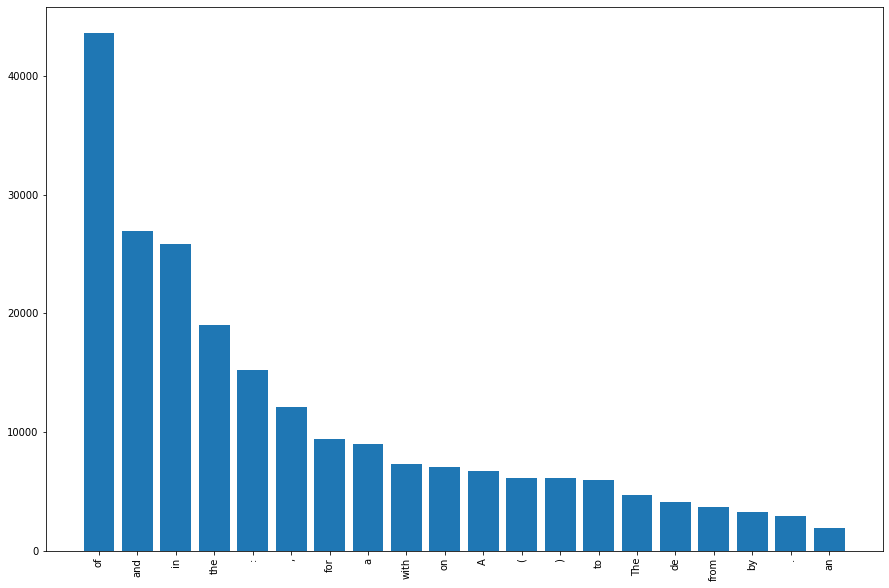

In [ ]:
x,y = zip(*topwordstitle)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# analisis de frecuencia en palabras de 'content'
all_tokens_content = []
for t in df['tokenized_content']:
    all_tokens_content.extend(t)

In [ ]:
print("all_tokens_content =",len(all_tokens_content))

all_tokens_content = 11458618


In [ ]:
# analisis de frecuencia en palabras de 'content'
fdist_content = nltk.FreqDist(all_tokens_content)
print('Size BoW_content=',len(fdist_content))
topwordscontent = fdist_content.most_common(20)

Size BoW_content= 359326


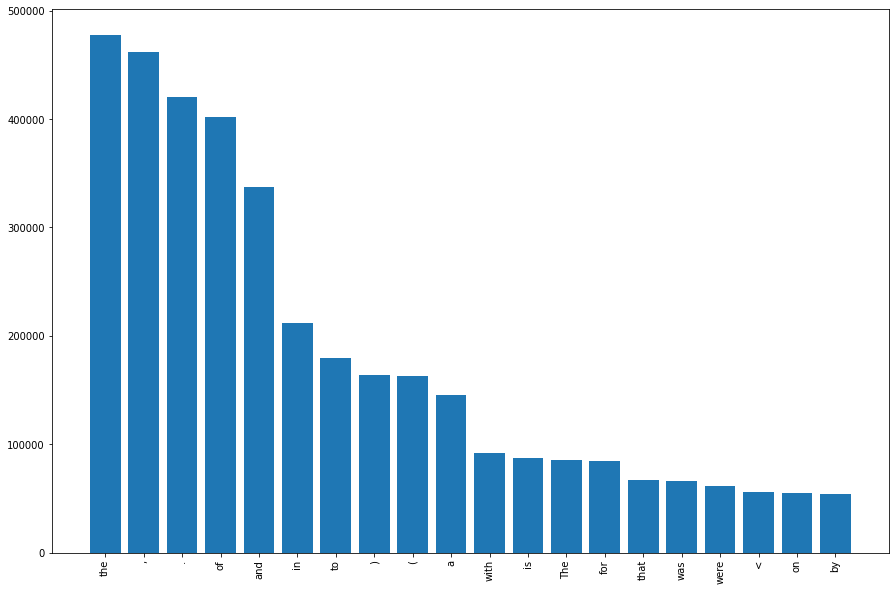

In [ ]:
x,y = zip(*topwordscontent)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'wasn', 'only', 'weren', 'some', 'most', 'ma', 'couldn', 'his', 'up', 'will', 'out', 'hers', "should've", 'against', 'o', 'where', "shouldn't", 'it', 'they', 'shouldn', 'into', 'for', 'all', 'does', "you'd", 'above', 'further', "she's", 'having', "wasn't", 'm', 'on', 'do', 'or', "haven't", 'me', 'll', 'which', 'you', 'these', 'himself', 've', "it's", 'an', 'not', 'those', 'herself', 'any', 'yours', "shan't", 'a', 'who', 'such', 'is', 'd', "couldn't", "you'll", 'themselves', 'was', 'can', 'shan', "aren't", 'about', 'ain', 'mustn', 'isn', 'ourselves', 'between', 'just', 'both', 'more', 'with', 'why', 'theirs', 'each', "doesn't", 'that', "didn't", 'we', 'off', 'at', 'of', 'had', 'has', "hasn't", 'yourselves', 'have', 't', 'too', 'than', 'aren', "mustn't", 'our', 'wouldn', 'few', 'so', 'been', 'by', "needn't", 'yourself', 'don', 'while', 'needn', 'ours', 'own', 'hadn', 'what', 'did', 'here', 'same', 'i', 'because', 'itself', 'to', 'y', 'your', "weren't", 'myself', "don't", "isn't", "h

Size of new BoW title = 80375


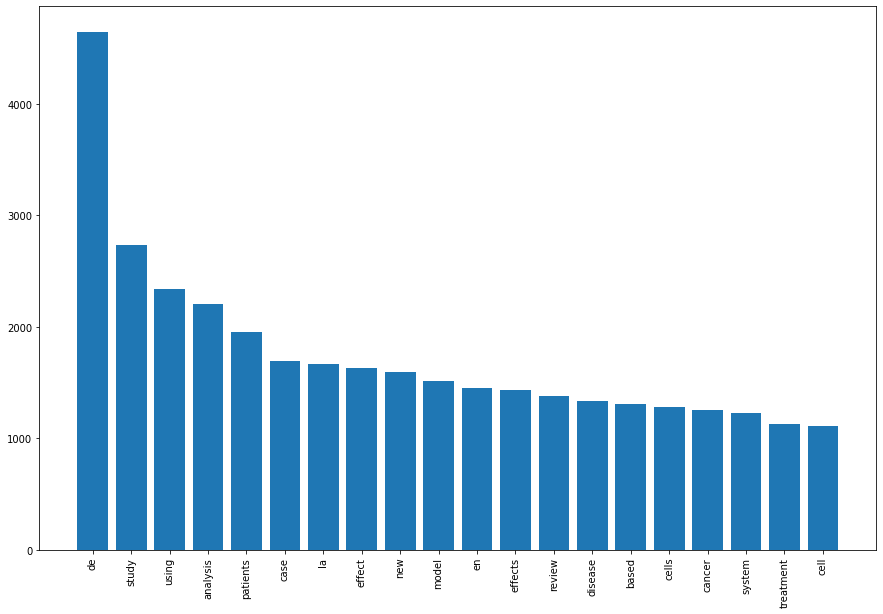

In [ ]:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens_title o all_tokens_content
tokens = [w.lower() for w in all_tokens_title if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW title = 61444


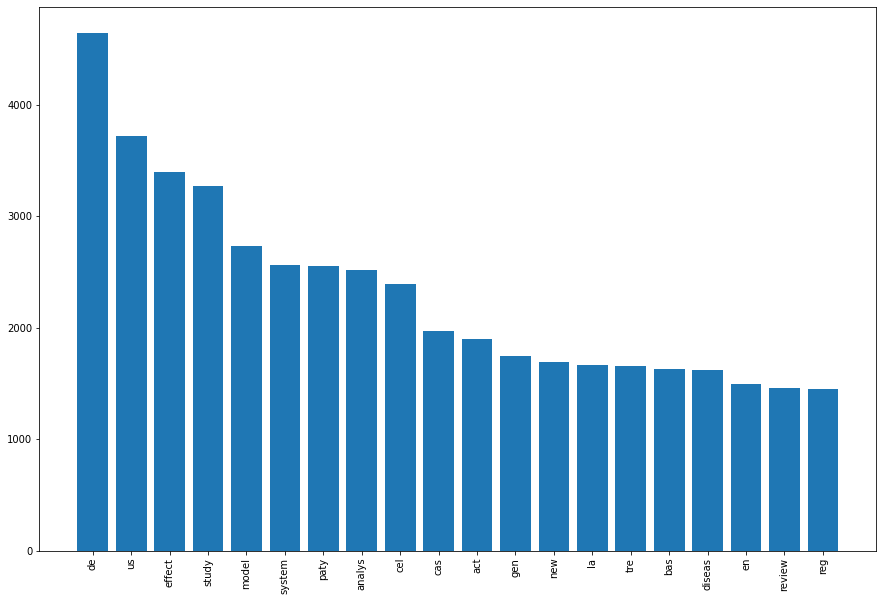

In [ ]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def prep_text(text):
    tokens = nltk.word_tokenize(str(text))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [re.sub('((www.[^s]+)|(https?://[^s]+))',' ',w) for w in tokens]
    tokens = [re.sub(r'http\S+', '', w)for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk]
    tokens = [lancaster.stem(w) for w in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens]